# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

Działanie filtrów dolnoprzepustowych opiera się na usuwaniu elementów obrazu o wysokiej częstotliwości (szczegółów, np. dużych różnic w kolorach pomiędzy sąsiadującymi pikselami) i przepuszczaniu elementów o niskiej częstotliwości (ogólnych kształtów, bez szczegółów). Ponieważ większość szumów występujących w obrazach zawiera się w wysokich częstotliwościach, filtry te przeważnie wykorzystuje się właśnie do eliminacji zakłóceń. Właściwie dopasowując rząd macierzy filtru można usuwać zakłócenia różnej wielkości, ograniczając przy tym utratę szczegółów(wysokich częstotliwości) w odfiltrowywanym obrazie. Filtry dolnoprzepustowe to zazwyczaj filtry uśredniające z pewnymi wagami.

In [2]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate




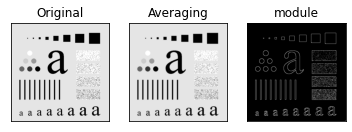

In [3]:
plansza = cv2.imread('plansza.png')
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(plansza,-1,kernel)
abs = np.abs(np.array(plansza) - np.array(dst))
plt.subplot(131),plt.imshow(plansza),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(abs),plt.title('module')
plt.xticks([]), plt.yticks([])
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

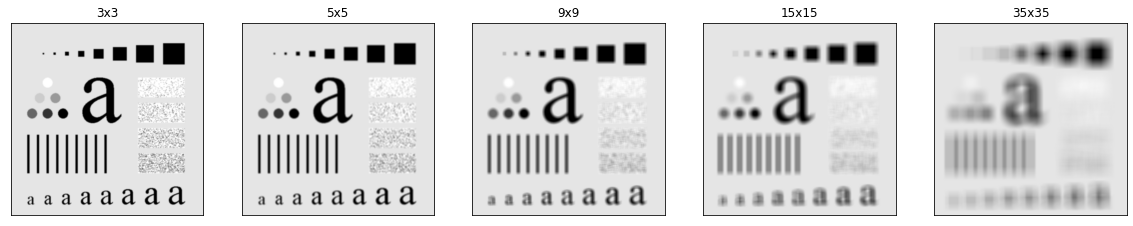

In [4]:
kernel5 = np.ones((5,5),np.float32)/25
dst5 = cv2.filter2D(plansza,-1,kernel5)
kernel9 = np.ones((9,9),np.float32)/81
dst9 = cv2.filter2D(plansza,-1,kernel9)
kernel15 = np.ones((15,15),np.float32)/225
dst15 = cv2.filter2D(plansza,-1,kernel15)
kernel35 = np.ones((35,35),np.float32)/1225
dst35 = cv2.filter2D(plansza,-1,kernel35)
f, ax = plt.subplots(1, 6, figsize = (20,20))
plt.subplot(151),plt.imshow(dst),plt.title('3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(dst5),plt.title('5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(dst9),plt.title('9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(dst15),plt.title('15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(dst35),plt.title('35x35')
plt.xticks([]), plt.yticks([])
plt.show()

Im większa jest maska, tym więcej pikseli podlega filtracji. Wraz z zwiększeniem maski traci się ostrość obrazu.

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

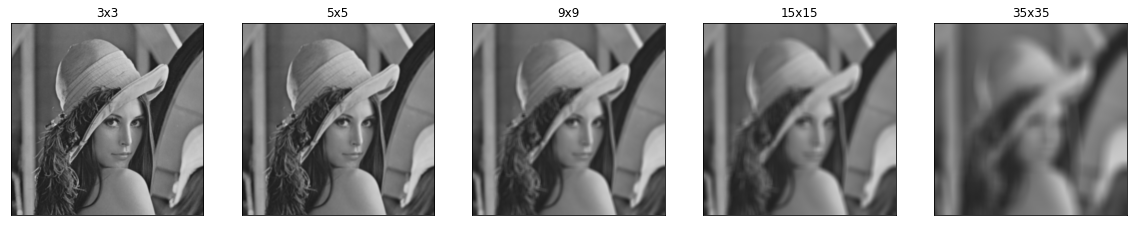

In [5]:
lena = cv2.imread('lena.png')
kernel = np.ones((3,3),np.float32)/9
dst = cv2.filter2D(lena,-1,kernel)
kernel5 = np.ones((5,5),np.float32)/25
dst5 = cv2.filter2D(lena,-1,kernel5)
kernel9 = np.ones((9,9),np.float32)/81
dst9 = cv2.filter2D(lena,-1,kernel9)
kernel15 = np.ones((15,15),np.float32)/225
dst15 = cv2.filter2D(lena,-1,kernel15)
kernel35 = np.ones((35,35),np.float32)/1225
dst35 = cv2.filter2D(lena,-1,kernel35)
f, ax = plt.subplots(1, 6, figsize = (20,20))
plt.subplot(151),plt.imshow(dst),plt.title('3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(152),plt.imshow(dst5),plt.title('5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(153),plt.imshow(dst9),plt.title('9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(154),plt.imshow(dst15),plt.title('15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(155),plt.imshow(dst35),plt.title('35x35')
plt.xticks([]), plt.yticks([])
plt.show()

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


(([], []), ([], []))

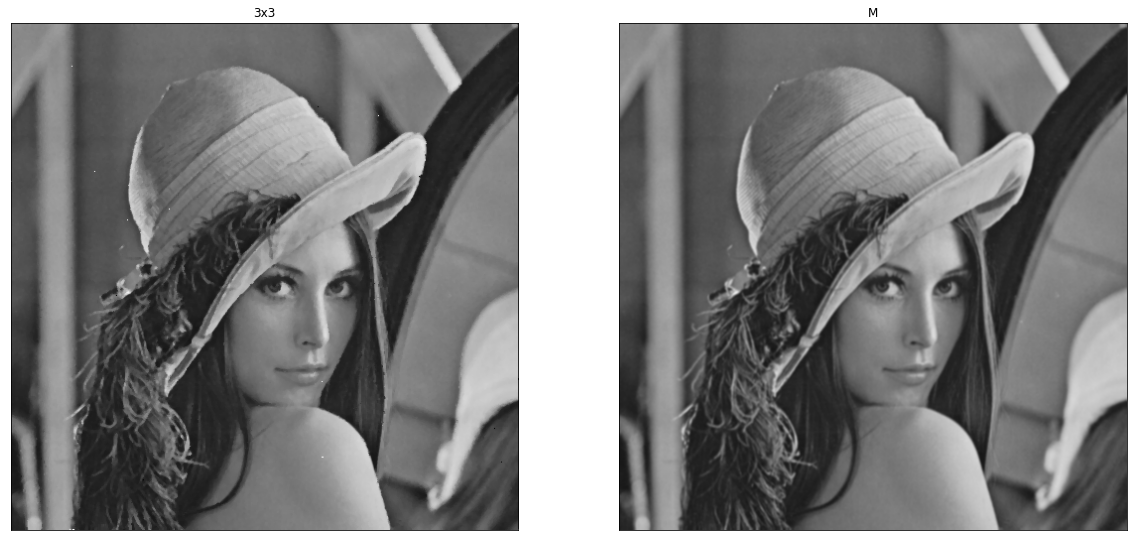

In [50]:
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = M/sum(sum(M))
print(M)
kernelM = M
dstM = cv2.filter2D(lena,-1,kernelM)

f, ax = plt.subplots(1, 2, figsize = (20,20))
plt.subplot(121),plt.imshow(dst),plt.title('3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dstM),plt.title('M')
plt.xticks([]), plt.yticks([])

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [51]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    ax.plot_surface(X, Y, Z)
    
    plt.show()

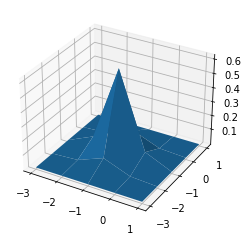

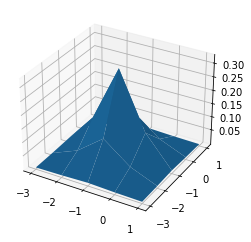

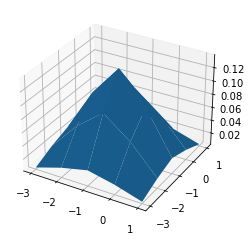

In [52]:
maska = fgaussian(5,0.5)
mesh(maska,5)
maska = fgaussian(5,0.7)
mesh(maska,5)
maska = fgaussian(5,1.1)
mesh(maska,5)
#blur = cv2.GaussianBlur(img,(5,5),0)

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


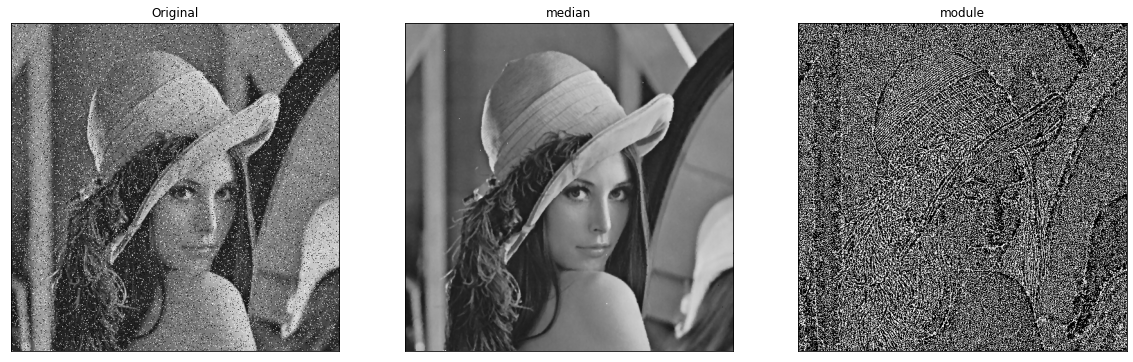

In [53]:
img = cv2.imread('lenaszum.png')
dst = cv2.medianBlur(img,3)
abs = np.abs(np.array(img) - np.array(dst))
f, ax = plt.subplots(1, 3, figsize = (20,20))
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(abs),plt.title('module')
plt.xticks([]), plt.yticks([])
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

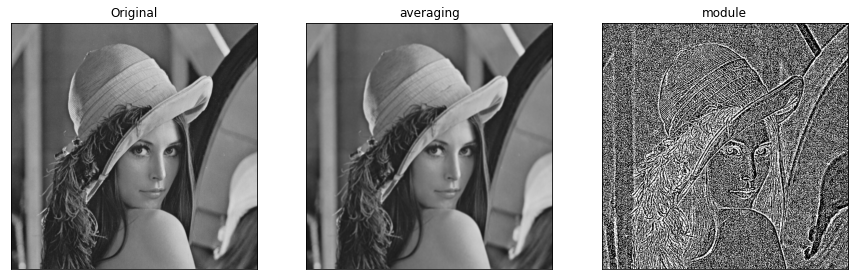

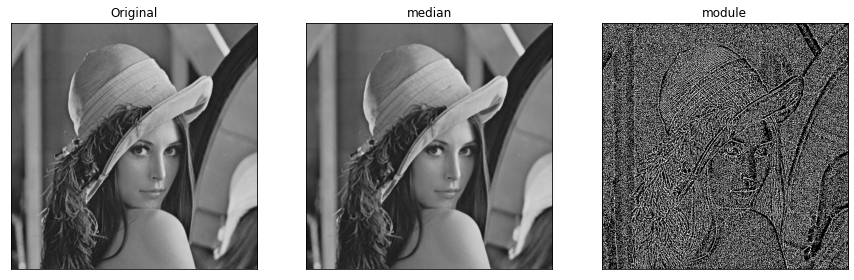

In [54]:
kernel_avg = np.ones((3,3),np.float32)/9
dst_avg = cv2.filter2D(lena,-1,kernel_avg)
abs_avg = np.abs(np.array(lena) - np.array(dst_avg))

dst_m = cv2.medianBlur(lena,3)
abs_m = np.abs(np.array(lena) - np.array(dst_m))

f, ax = plt.subplots(1, 3, figsize = (15,15))
plt.subplot(131),plt.imshow(lena),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst_avg),plt.title('averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(abs_avg),plt.title('module')
plt.xticks([]), plt.yticks([])
plt.show()

f, ax = plt.subplots(1, 3, figsize = (15,15))
plt.subplot(231),plt.imshow(lena),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(dst_m),plt.title('median')
plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(abs_m),plt.title('module')
plt.xticks([]), plt.yticks([])
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

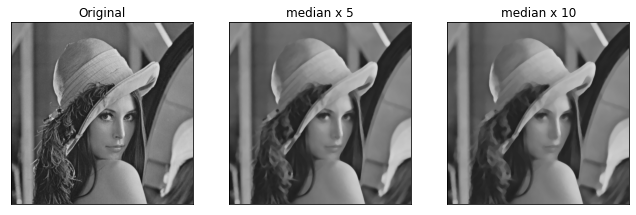

In [56]:
lena_for_5 = cv2.imread('lena.png')
lena_for_10 = cv2.imread('lena.png')
for _ in range (5):
    dst_m_5 = cv2.medianBlur(lena_for_5,5)
    lena_for_5 = dst_m_5
    
for _ in range (10):
    dst_m_10 = cv2.medianBlur(lena_for_10,5)
    lena_for_10 = dst_m_10    
    
abs_m = np.abs(np.array(lena) - np.array(lena_for_5))    
f, ax = plt.subplots(1, 3, figsize = (15,15))
plt.subplot(141),plt.imshow(lena),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(dst_m_5),plt.title('median x 5')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(dst_m_10),plt.title('median x 10')
plt.xticks([]), plt.yticks([])

plt.show()

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

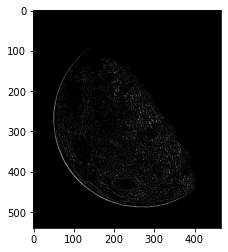

In [83]:
moon = cv2.imread('moon.png',0)
#print(moon)
scharr = np.array([[ 0, 1, 0],
                   [ 1, -4, 1],
                   [ 0, 1, 0]], np.float32)/9
moon_filt = cv2.filter2D(moon,-1,scharr)

moon_filt = np.abs(moon_filt)  + 128

plt.imshow(moon_filt,'gray')
plt.show()


7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



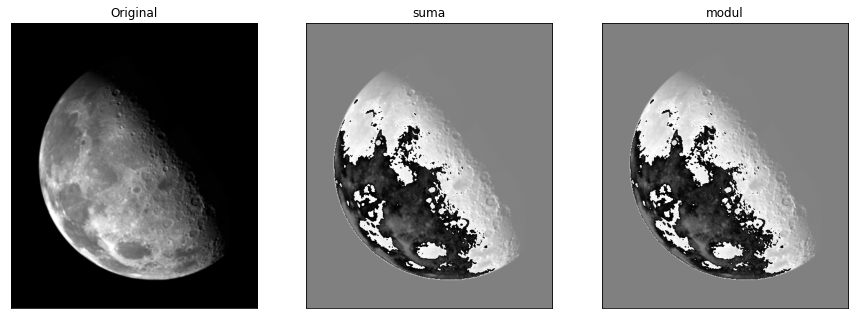

In [90]:
moon_2 = np.array(moon) + np.array(moon_filt)
moon_3 = np.abs(np.array(moon) - np.array(moon_filt))
f, ax = plt.subplots(1, 3, figsize = (15,15))
plt.subplot(131),plt.imshow(moon,'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(moon_2,'gray'),plt.title('suma')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(moon_3,'gray'),plt.title('modul')
plt.xticks([]), plt.yticks([])
plt.show()

#plt.imshow(moon_2,'gray')
#plt.imshow(moon,'gray')


### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [95]:
kw = cv2.imread('kw.png',0)
R1 = np.array([[ 0, 0, 0],
               [ -1, 0, 0],
               [ 0, 1, 0]])
R2 = np.array([[ 0, 0, 0],
               [ 0, 0, -1],
               [ 0, 1, 0]])
P1 = np.array([[ -1, 0, 1],
               [ -1, 0, 1],
               [ -1, 1, 1]])
P2 = np.array([[ -1, -1, -1],
               [ 0, 0, 0],
               [ 1, 1, 1]])
S1 = np.array([[ -1, 0, -1],
               [ -2, 0, 2],
               [ -1, 0, 1]])
S2 = np.array([[ -1, -2, -1],
               [ 0, 0, 0],
               [ 1, 2, 1]])

In [101]:
def grad_filt(I, mask):
    I = I/9
    I_2 = cv2.filter2D(I,-1, mask)
    I_3 = (I_2+128)
    I_4 = np.abs(I_2)
    I_5 = np.abs(I_3)
    I_sum = I+I_5
    I_abs = np.abs(I-I_5)

    
    f, ax = plt.subplots(1, 3, figsize = (15,15))
    plt.subplot(131),plt.imshow(I,'gray'),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(I_sum,'gray'),plt.title('suma')
    plt.xticks([]), plt.yticks([])
    plt.subplot(133),plt.imshow(I_abs,'gray'),plt.title('modul')
    plt.xticks([]), plt.yticks([])
    plt.show()

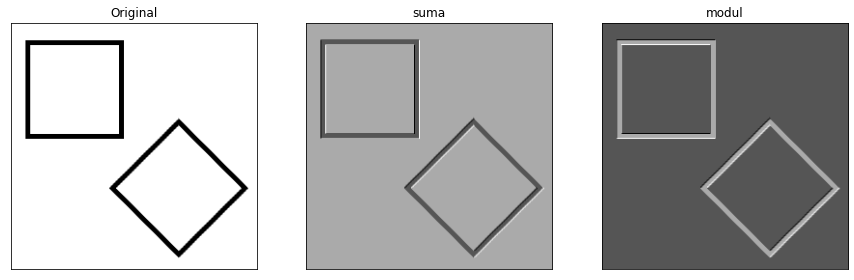

In [102]:
grad_filt(kw,R1)

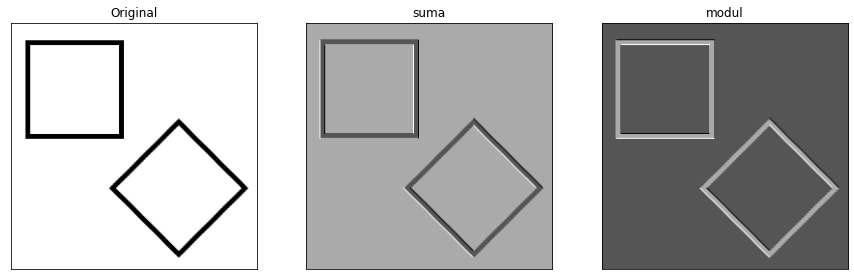

In [103]:
grad_filt(kw,R2)

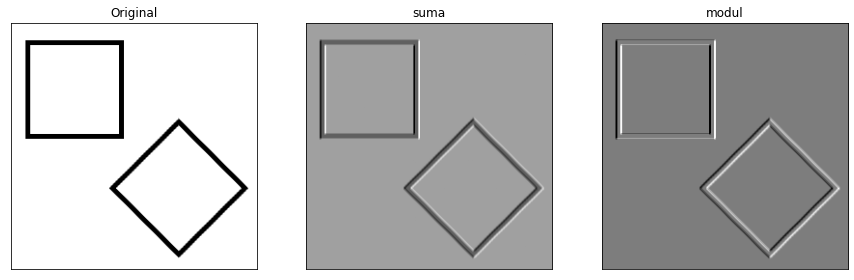

In [104]:
grad_filt(kw,P1)

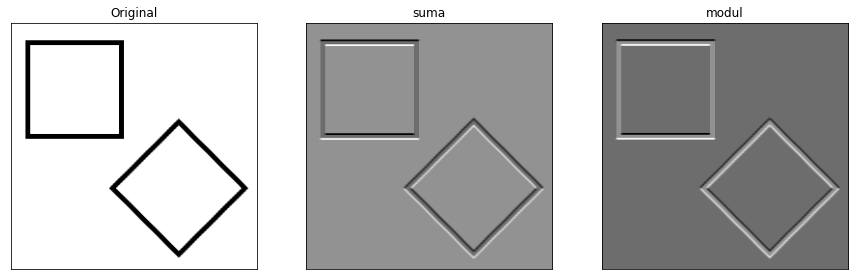

In [105]:
grad_filt(kw,P2)

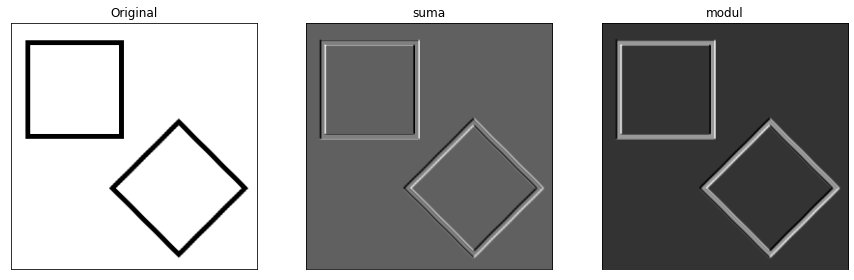

In [106]:
grad_filt(kw,S1)

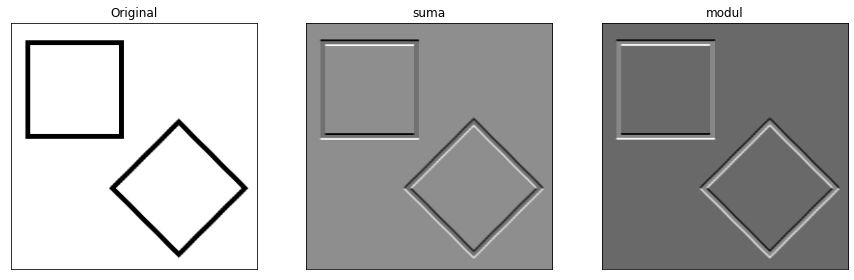

In [107]:
grad_filt(kw,S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



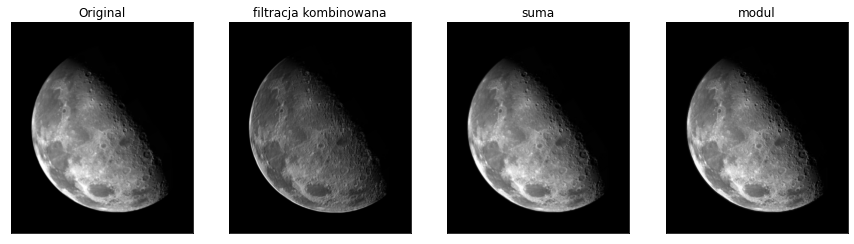

In [119]:
M = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE).astype(int)

def comb_filt(M, mask1, mask2):
    mask1 = mask1/9
    mask2 = mask2/9
    MS1 = signal.convolve2d(M, mask1, mode="same")
    MS2 = signal.convolve2d(M, mask2, mode="same")
    M_out = np.sqrt((MS1)**2+(MS2)**2)
    M_abs = np.abs(M-M_out)
    M_sum = M+M_abs

    f, ax = plt.subplots(1, 4, figsize = (15,15))
    plt.subplot(141),plt.imshow(M,'gray'),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(M_out,'gray'),plt.title('filtracja kombinowana')
    plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(M_sum,'gray'),plt.title('suma')
    plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(M_abs,'gray'),plt.title('modul')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
comb_filt(M, S1, S2)


6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [120]:
def comb_filt2(M, mask1, mask2):
    mask1 = mask1/9
    mask2 = mask2/9
    MS1 = signal.convolve2d(M, mask1, mode="same")
    MS2 = signal.convolve2d(M, mask2, mode="same")
    M_out = np.abs(MS1) + np.abs(MS2)
    M_abs = np.abs(M-M_out)
    M_sum = M+M_abs

    f, ax = plt.subplots(1, 4, figsize = (15,15))
    plt.subplot(141),plt.imshow(M,'gray'),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(M_out,'gray'),plt.title('filtracja kombinowana')
    plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(M_sum,'gray'),plt.title('suma')
    plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(M_abs,'gray'),plt.title('modul')
    plt.xticks([]), plt.yticks([])
    plt.show()


7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

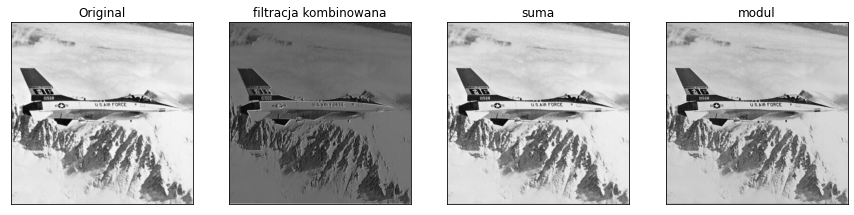

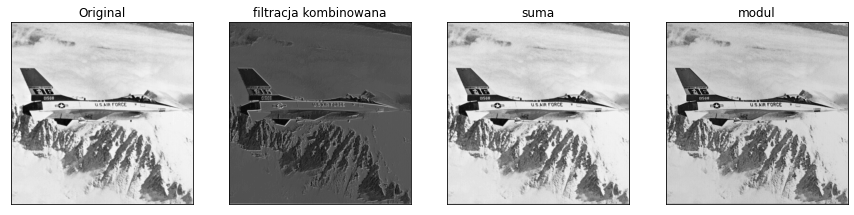

In [121]:
J = cv2.imread("jet.png", 0).astype(int)
comb_filt(J, S1, S2)
comb_filt2(J, S1, S2)
